In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from librosa.feature import melspectrogram
from librosa.core import stft
from cnn1_classifier import Cnn1DRecognizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
dt_frame = pd.read_csv("C:\\Users\\1\\Desktop\\EegProject\\datasets\\emotions.csv")
labels_to_idx = {
    "NEUTRAL": 0,
    "POSITIVE": 1,
    "NEGATIVE": 2
}

In [3]:
data = dt_frame.to_numpy()
waves = data[:, :-1]
labels = np.asarray([labels_to_idx[label] for label in data[:, -1]])

In [4]:
mel_samples = np.asarray([melspectrogram(y=wave.astype(np.float64), hop_length=64, sr=120000) for wave in waves[np.random.randint(0, 100, 5), :]])
mel_std = (mel_samples - np.mean(mel_samples)) / np.std(mel_samples)

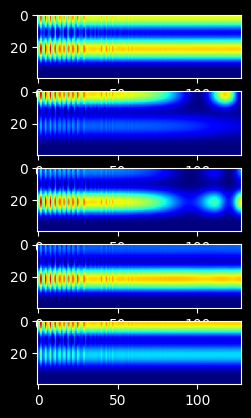

In [5]:
plt.style.use("dark_background")

_, axis = plt.subplots(nrows=5)
for i, mel in enumerate(mel_std):
    axis[i].imshow(np.real(mel.T[:, :]), cmap="jet")

plt.show()



In [6]:
mels = np.asarray([melspectrogram(y=wave.astype(np.float64), hop_length=64, sr=120000) for wave in waves[:, :]])
mels_std = (mels - np.mean(mels)) / np.std(mels)

In [7]:
model = Cnn1DRecognizer(input_sh=mels.shape[1:])
model.compile(optimizer=Adam(learning_rate=0.01), loss_fn=SparseCategoricalCrossentropy())

In [8]:
model_train_history = model.fit(
    mels, labels,
    epochs=100,
    batch_size=64
)

Epoch 1/100
34/34 [==============================] - 2s 25ms/step - prediction loss: 1.5705
Epoch 2/100
34/34 [==============================] - 1s 22ms/step - prediction loss: 1.1399
Epoch 3/100
34/34 [==============================] - 1s 25ms/step - prediction loss: 1.1154
Epoch 4/100
34/34 [==============================] - 1s 26ms/step - prediction loss: 1.1011
Epoch 5/100
34/34 [==============================] - 1s 25ms/step - prediction loss: 1.0999
Epoch 6/100
34/34 [==============================] - 1s 30ms/step - prediction loss: 1.0989
Epoch 7/100
34/34 [==============================] - 1s 28ms/step - prediction loss: 1.1000
Epoch 8/100
34/34 [==============================] - 1s 30ms/step - prediction loss: 1.1000
Epoch 9/100
34/34 [==============================] - 1s 26ms/step - prediction loss: 1.0988
Epoch 10/100
34/34 [==============================] - 1s 26ms/step - prediction loss: 1.0984
Epoch 11/100
34/34 [==============================] - 1s 33ms/step - prediction

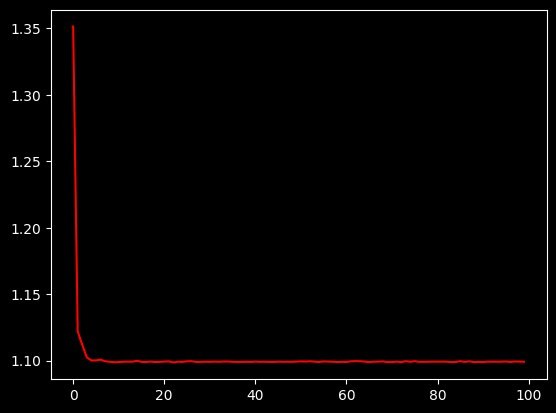

In [9]:
_, axis = plt.subplots()
axis.plot(model_train_history.history["prediction loss"], color="r")
plt.show()